In [1]:
from dataset.msc_summary import MSC_Summaries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

In [2]:
configs_options = {
    "speaker_prefixes": [None, ["<other>", "<self>"]],
    "nofact_token": ['', "<nofact>"],
}
basedir = "/Users/FrankVerhoef/Programming/PEX/data/msc/msc_personasummary/"
subsets = {
    1: ['train', 'valid', 'test'],
    2: ['train', 'valid', 'test'],
    3: ['train', 'valid', 'test'],
    4: ['valid', 'test']
}

In [3]:
configs = {
    "default": {
        "speaker_prefixes": ["<other>", "<self>"],
        "nofact_token": '',
    }
}


In [4]:
MSC_Summaries.set(**configs['default'])

In [5]:
msc_summaries = {
    session: {
        subset: MSC_Summaries(basedir=basedir, session=session, subset=subset) 
        for subset in subsets[session]
    }
    for session in subsets.keys()
}

In [6]:
m = {
    session: {subset: msc_summaries[session][subset].measurements() for subset in subsets[session]}
    for session in subsets.keys()
}

## Show a few examples

In [7]:
for i in range(10):
    print(msc_summaries[1]['train'][i])

(["<self> I need some advice on where to go on vacation, have you been anywhere lately? <other> I have been all over the world. I'm military.", '<self> That is good you have alot of travel experience <other> Sure do. And a lot of experience blowing things up! Haha. Bora bora is nice.', "<self> I've been working non stop crazy hours and need a break. <other> The best breaks are spent with cute cuddly kittens.", '<self> Bora bora sounds nice, you have been there before? <other> Nope... Just sounds nice, and repetitive. Bora... Bora. Ha!', '<self> Kittens really? I rather be at the beach. <other> Only if the beach was covered in kittens!', '<self> That would be a sight to see. <other> Or maybe brownies... I love chocolate.', "<self> I love brownies too but I haven't quite perfected mine yet. <other> Well I'm available to taste test!"], "I served or serve in the military.\nI've traveled the world.\nI've blown things up.\nI've never been to Bora Bora.\nI love chocolate.")
(["<self> Hello! W

In [8]:
for i in range(10):
    print(msc_summaries[4]['valid'][i])

(["<self> Do you have any new stunt double jobs coming  up? <other> No, I don't have any at this time.", '<self> You must have a lot of free time to read then.  Are you reading anything good now? <other> I am reading The Butterfly Garden book, and it is good.  How was Fatal Charm?', "<self> It was very good, I love true crime books!  I'm definitely on the look out for something similar.  I spend a lot of time in the library, so I'll find something. <other> I also love True Crime!  Do you watch movies about True Crime as well?", "<self> Of course, I'll watch or read anything true crime related.  My kindle is just filled with crime books.  What was your experience with The Butterfly Garden? <other> It was so creepy it still enters my dreams.  I see you like Steven King movies, but what about his books?", "<self> I love the books more!  I'll never watch a Steven King movie until I've read the book.  I think the IT movies may have ruined clowns for me forever. <other> I did not see IT, but

## Measurements overview with Pandas Dataframe

In [9]:
# Collect all item measurements in a dataframe

df_colums = list(m[1]['train']["allitem_measurements"][0].keys())
df = pd.DataFrame(columns=df_colums).astype('int16')

for session in subsets.keys():
    for subset in subsets[session]:
        subset_df = pd.DataFrame.from_dict(m[session][subset]["allitem_measurements"]).astype('int16')

        subset_df["session"] = int(session)
        subset_df["subset"] = subset
    
        df = pd.concat([df, subset_df])

df["session"] = df["session"].astype('int')
df.describe()


,dialog_id,inputsentences,inputwords,labelwords,labelsentences,session
count,14289.000000,14289.000000,14289.000000,14289.000000,14289.000000,14289.000000
mean,1372.067325,6.392750,252.696270,34.620547,5.762405,2.020085
std,1184.841503,1.003071,94.066111,18.023665,2.524382,0.927270
min,0.000000,3.000000,62.000000,0.000000,1.000000,1.000000
25%,324.000000,6.000000,177.000000,22.000000,4.000000,1.000000
50%,1046.000000,6.000000,231.000000,32.000000,6.000000,2.000000
75%,2237.000000,7.000000,312.000000,44.000000,7.000000,3.000000
max,3999.000000,15.000000,776.000000,167.000000,22.000000,4.000000


In [10]:
# Overview of statistics, by session and subset

df.groupby(["session", "subset"]).agg({'dialog_id': ['count'], 'inputwords': ['mean', 'std'], 'labelwords': ['mean', 'std'], 'inputsentences': ['mean', 'std'], 'labelsentences': ['mean', 'std']})

dialog_id  inputwords            labelwords             \
                   count        mean        std       mean        std   
session subset                                                          
1       test         501  157.419162  20.340402  35.307385  14.267212   
        train       4000  172.454500  24.995692  31.498000  12.611017   
        valid        500  184.938000  19.739439  37.976000  14.460208   
2       test         501  286.818363  75.264659  38.371257  21.222203   
        train       4000  285.418750  91.151885  32.620750  18.182700   
        valid        500  291.498000  93.434137  38.738000  20.717814   
3       test         501  303.888224  75.706086  41.702595  23.535789   
        train       2285  310.280088  89.685871  36.600875  20.053693   
        valid        500  292.758000  85.987692  34.674000  18.029472   
4       test         501  321.502994  86.359750  41.982036  23.477770   
        valid        500  299.626000  78.473577  40.104000  22.470047   

               inputsentences           labelsentences            
                         mean       std           mean       std  
session subset                                                    
1       test         6.558882  0.568354       6.357285  2.216775  
        train        7.486750  0.835164       5.956250  2.183467  
        valid        7.768000  0.550256       6.932000  2.342296  
2       test         5.918164  0.373215       5.682635  2.635352  
        train        5.769250  0.650469       5.347000  2.520551  
        valid        5.880000  0.440441       5.822000  2.600739  
3       test         5.900200  0.407455       6.215569  3.144748  
        train        5.885339  0.437894       5.648140  2.654763  
        valid        5.870000  0.457732       5.424000  2.509346  
4       test         5.918164  0.362339       6.045908  2.966461  
        valid        5.886000  0.425872       5.912000  2.832720

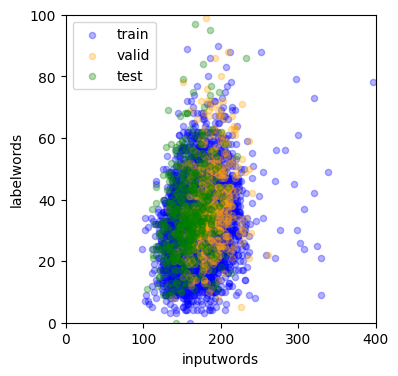

In [29]:
# session=1
# subset='test'

fig, ax = plt.subplots(figsize=(4,4))
color = {'train': 'blue', 'valid':'orange', 'test':'green'}

for subset in subsets[session]:
    selection = (df["session"] == session) & (df["subset"] == subset)
    df_selection = df[selection]
    scatter_ax = df_selection.plot.scatter(ax=ax, x='inputwords', y='labelwords', c=color[subset], alpha=0.3, xlim=(0,400), ylim=(0,100), label=subset)


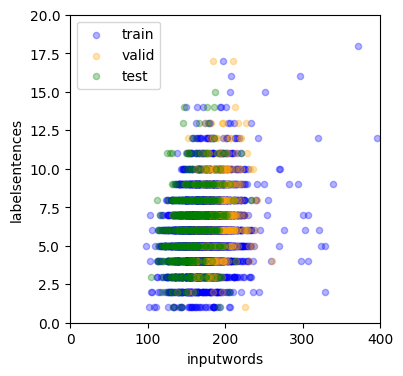

In [32]:
fig, ax = plt.subplots(figsize=(4,4))
color = {'train': 'blue', 'valid':'orange', 'test':'green'}

for subset in subsets[session]:
    selection = (df["session"] == session) & (df["subset"] == subset)
    df_selection = df[selection]
    scatter_ax = df_selection.plot.scatter(ax=ax, x='inputwords', y='labelsentences', c=color[subset], alpha=0.3, xlim=(0,400), ylim=(0,20), label=subset)


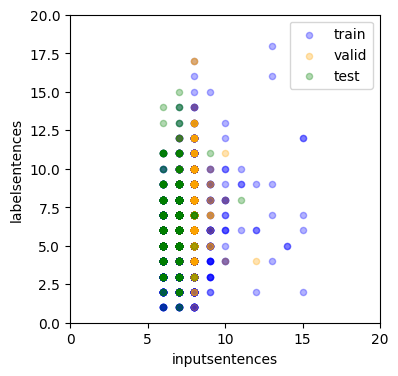

In [34]:
fig, ax = plt.subplots(figsize=(4,4))
color = {'train': 'blue', 'valid':'orange', 'test':'green'}

for subset in subsets[session]:
    selection = (df["session"] == session) & (df["subset"] == subset)
    df_selection = df[selection]
    scatter_ax = df_selection.plot.scatter(ax=ax, x='inputsentences', y='labelsentences', c=color[subset], alpha=0.3, xlim=(0,20), ylim=(0,20), label=subset)


In [23]:
len(df_selection[df_selection['subset'] == 'valid'])

500

/Users/FrankVerhoef/opt/miniconda3/envs/pex/lib/python3.9/site-packages/numpy/lib/histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


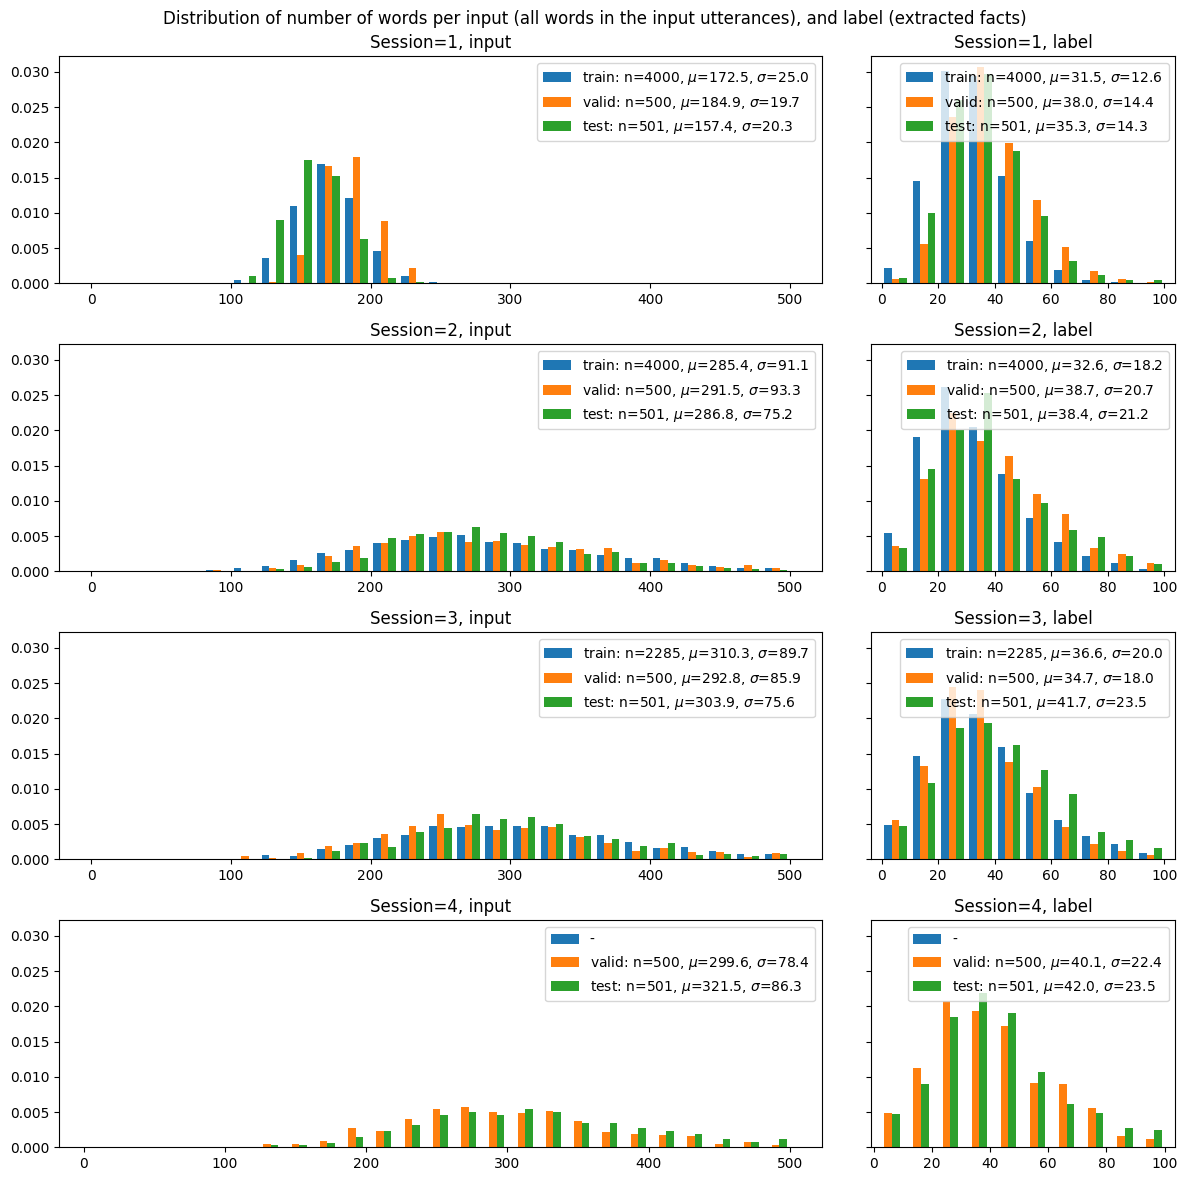

In [36]:
## Using matplottlib - horizontal

fig, ax = plt.subplots(ncols=2, nrows=len(subsets.keys()), figsize=(12, 12), gridspec_kw={'width_ratios': [10, 4]}, sharey=True)

def plot_hist_bar(ax, values, session, title, bins, range):
    labels = [f"{subset}: n={len(vals)}, " + r"$\mu$" + f"={vals.mean():.1f}, " + r"$\sigma$" + f"={vals.std():.1f}" for subset, vals in zip(subsets[session], values)]
    if session==4:
        labels = ['-'] + labels # add empty label
        values = [-1] + values # plot a bar, outside the range
    n, bins, patches = ax.hist(values, bins=bins, range=range, density=True, label=labels)
    legend = ax.legend()
    title = ax.set_title(title)
    return ax

for i, session in enumerate([1,2,3, 4]):
    m_input = [np.hstack([[val] * freq for val, freq in m[session][subset]['inputwords_per_sample']]) for subset in subsets[session]]
    m_label = [np.hstack([[val] * freq for val, freq in m[session][subset]['labelwords_per_sample']]) for subset in subsets[session]]
    bar_axes = plot_hist_bar(ax[i][0], m_input, session, title=f"Session={session}, input", bins=25, range=(0,500))
    bar_axes = plot_hist_bar(ax[i][1], m_label, session, title=f"Session={session}, label", bins=10, range=(0,100))

fig.suptitle("Distribution of number of words per input (all words in the input utterances), and label (extracted facts)")
fig.tight_layout()

/Users/FrankVerhoef/opt/miniconda3/envs/pex/lib/python3.9/site-packages/numpy/lib/histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


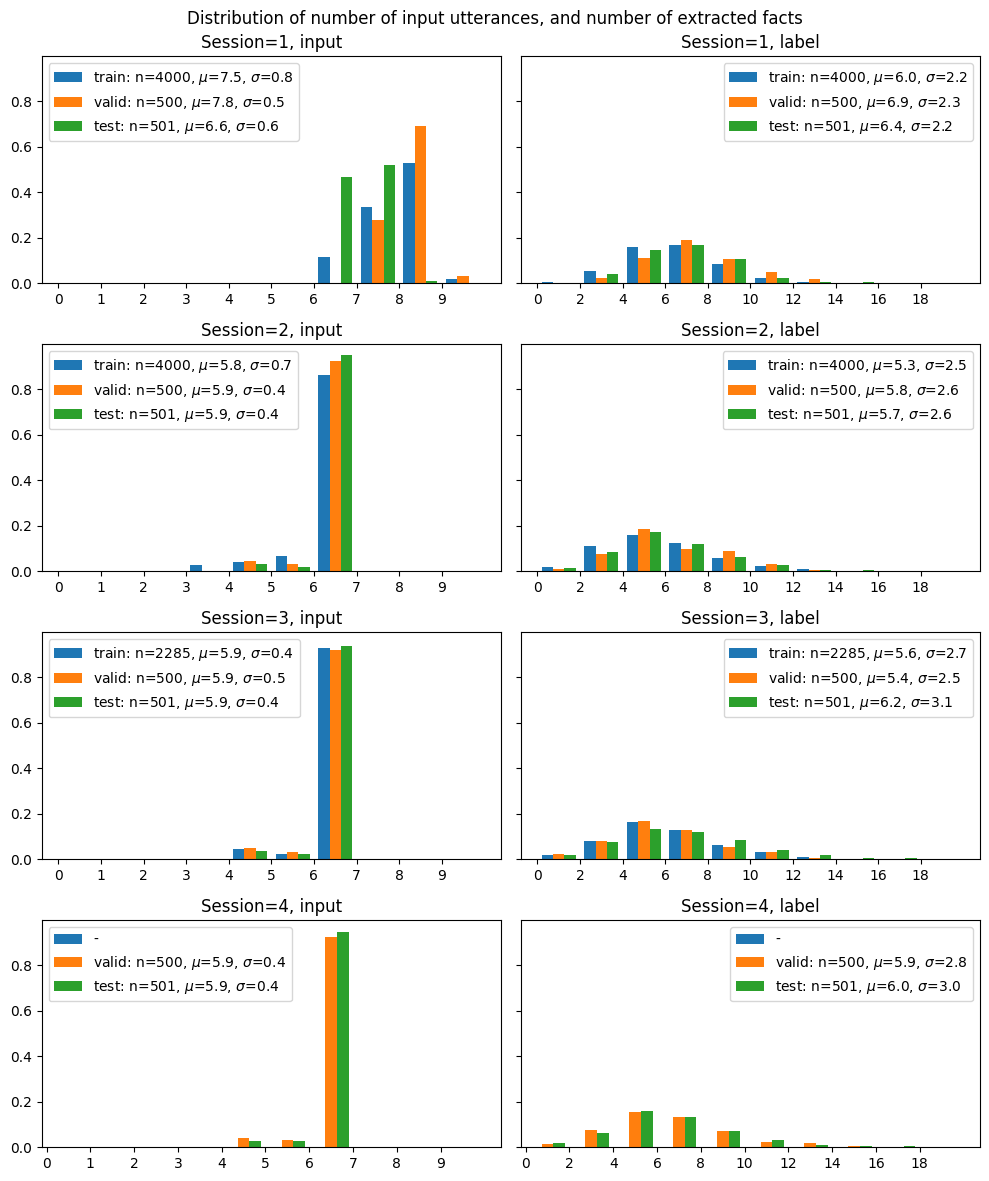

In [61]:
## Using matplottlib - horizontal

fig, ax = plt.subplots(ncols=2, nrows=len(subsets.keys()), figsize=(10, 12), gridspec_kw={'width_ratios': [4, 4]}, sharey=True)

def plot_hist_bar(ax, values, session, title, bins, x_range):
    labels = [f"{subset}: n={len(vals)}, " + r"$\mu$" + f"={vals.mean():.1f}, " + r"$\sigma$" + f"={vals.std():.1f}" for subset, vals in zip(subsets[session], values)]
    ax.set_xticks(range(0, x_range[1], x_range[1] // bins))
    if session==4:
        labels = ['-'] + labels # add empty label
        values = [-1] + values # plot a bar, outside the range
    n, bins, patches = ax.hist(values, bins=bins, range=x_range, density=True, label=labels)
    legend = ax.legend()
    
    title = ax.set_title(title)
    return ax

for i, session in enumerate([1,2,3, 4]):
    m_input = []
    m_label = []
    for subset in subsets[session]:
        selection = selection = (df["session"] == session) & (df["subset"] == subset)
        m_input.append(df[selection]['inputsentences'].values)
        m_label.append(df[selection]['labelsentences'].values)
    bar_axes = plot_hist_bar(ax[i][0], m_input, session, title=f"Session={session}, input", bins=10, x_range=(0,10))
    bar_axes = plot_hist_bar(ax[i][1], m_label, session, title=f"Session={session}, label", bins=10, x_range=(0,20))

fig.suptitle("Distribution of number of input utterances, and number of extracted facts")
fig.tight_layout()